In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv', sep=",")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
# Add 'overweight' column
bmi = df.weight / ((df.height / 100) ** 2)
df['overweight'] = np.where(bmi < 25, 0, 1)
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.cholesterol = np.where(df.cholesterol == 1, 0, 1)
df.gluc = np.where(df.gluc == 1, 0, 1)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
32458,46361,18376,1,160,47.0,110,80,0,0,0,0,1,0,0
45420,64887,14479,2,167,64.0,110,80,1,0,1,1,1,0,0
34954,49928,18475,1,164,72.0,100,80,1,0,0,0,1,0,1
38785,55370,18490,1,165,76.0,120,70,0,0,0,0,1,0,1
7446,10613,18992,2,167,69.0,120,80,0,0,0,0,0,0,0


In [6]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], var_name= 'variable')
df_cat


,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [7]:
df_cat.groupby('cardio').variable.value_counts()

cardio  variable   
0       active         35021
        alco           35021
        cholesterol    35021
        gluc           35021
        overweight     35021
        smoke          35021
1       active         34979
        alco           34979
        cholesterol    34979
        gluc           34979
        overweight     34979
        smoke          34979
Name: variable, dtype: int64

In [8]:
df_cat.groupby(['cardio', 'variable']).count()

value
cardio variable          
0      active       35021
       alco         35021
       cholesterol  35021
       gluc         35021
       overweight   35021
       smoke        35021
1      active       34979
       alco         34979
       cholesterol  34979
       gluc         34979
       overweight   34979
       smoke        34979

In [9]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
# You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active',  'alco', 'cholesterol', 'gluc',  'overweight', 'smoke'], var_name= 'variable')
df_cat
    

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


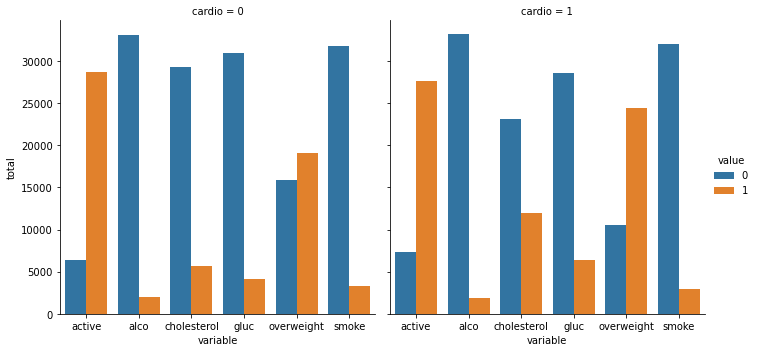

In [10]:
# Draw the catplot with 'sns.catplot()'
sns_cat=sns.catplot(data=df_cat, x='variable', hue='value', kind='count', col='cardio').set(xlabel='variable', ylabel='total')


# Get the figure for the output
fig = sns_cat.fig

 # Do not modify the next two lines
fig.savefig('catplot.png')
#return fig


Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [11]:
df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] <= df['height'].quantile(0.025)) & (df['height'] >= df['height'].quantile(0.975)) & (df['weight'] <= df['weight'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.975))]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight


In [12]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) \
    & (df['height'] >= df['height'].quantile(0.025)) \
    & (df['height'] <= df['height'].quantile(0.975)) \
    & (df['weight'] >= df['weight'].quantile(0.025)) \
    & (df['weight'] <= df['weight'].quantile(0.975))]

In [13]:
 # Calculate the correlation matrix
corr = df_heat.corr()

In [14]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000592
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089380
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052423
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.148628
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.656261
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017322
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172314
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.128061
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088127
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003057


In [15]:
 # Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

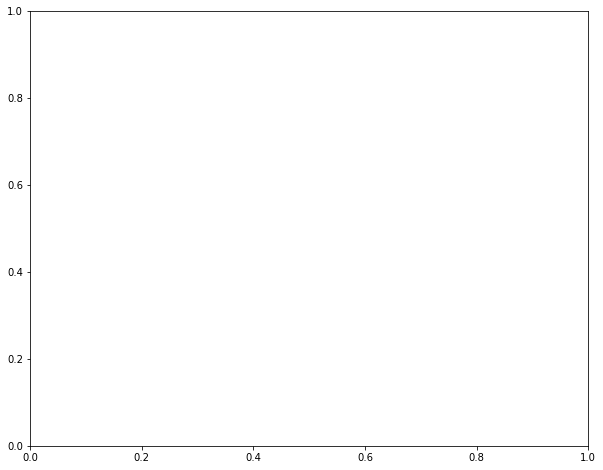

In [24]:
# Set up the matplotlib figure
fig, ax = plt.subplots( figsize=(10,8) )

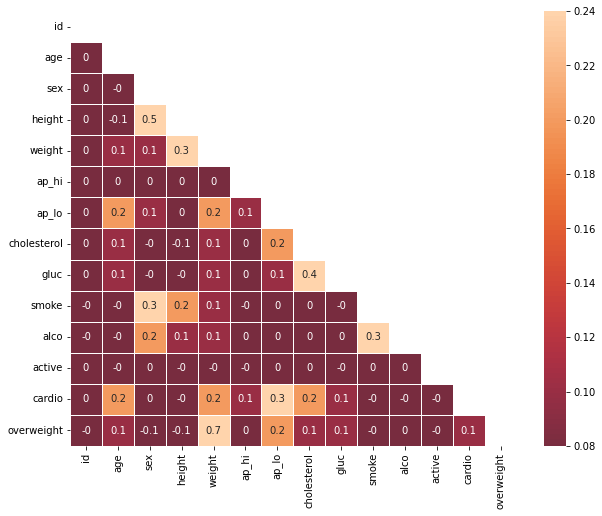

In [39]:
 # Draw the heatmap with 'sns.heatmap()'
fig, ax = plt.subplots( figsize=(10,8) )
sns.heatmap(round(corr, 1), mask=mask, annot=True, center=0, linewidths=1, vmin=0.08, vmax=0.24)
fig.savefig('heatmap.png')